# Imports

In [1]:
include("/Users/wladi/Projects/TFIPerturbationTheory/src/PertTheory.jl")
include("./params.jl")
using Plots

  Activating project at `~/Projects/TFIPerturbationTheory`


In [8]:
L = (5000,8)
N = 10000
J = -1;

dt = 1e-3
T = 10.

S = L[1]/2
mu = sqrt(S)
sigma = 1e-1

gs = [-0.25,-0.5,-0.75,-1.0,-1.25,-1.5,-1.75,-2.0]

8-element Vector{Float64}:
 -0.25
 -0.5
 -0.75
 -1.0
 -1.25
 -1.5
 -1.75
 -2.0

In [ ]:
dat = map(vcat(gs[1], gs[end])) do g
    # g = gs[1]
    # g = gs[1]
    params = (J,g,S)
    obs = obs_SG
    F   = F_SG2

    data = []
    Threads.@threads for num in 1:N
        t = 0
        dataTemp = []

        n0 = fill(S, L[2])
        c0 = sigma.*randn(L[2]) 
        s0 = sigma.*randn(L[2]) 
        fields = (n0, c0, s0)

        # Compute time evolution
        try
            while t < T
                push!(dataTemp, [t, obs(fields, params)...])
                fields = heun_step(fields, params, F, dt)
                # dt_new, fields = adaptive_heun_step(fields, params, F, dt, 1e-1)
                t += dt
            end
        catch
            @warn "Error, fields = $fields"
            continue
        end
        push!(data, dataTemp)
    end

    df_res = analyze_data(data, params)
    # CSV.write("/Users/wladi/Projects/TFIPerturbationTheory/data/TWA_SG_L=$(L[2])_Sz=$(S)_N=$(N)_g=$(g).csv", df_res)
    return df_res
    # plot(p)
end

In [9]:
dat = map(vcat(gs[1], gs[end])) do g
# dat = map(gs[1]) do g
    # g = gs[1]
    # g = gs[1]
    params = (J,g,S)
    obs = obs_SG2
    F   = F_SG2

    data = []
    Threads.@threads for num in 1:N
        t = 0
        dataTemp = []

        n0   = fill(S, L[2])
        phi0 = 2*pi*rand(L[2])
        fields = (n0, phi0)

        # Compute time evolution
        try
            while t < T
                push!(dataTemp, [t, obs(fields, params)...])
                fields = heun_step(fields, params, F, dt)
                # dt_new, fields = adaptive_heun_step(fields, params, F, dt, 1e-1)
                t += dt
            end
        catch
            @warn "Error, fields = $fields"
            continue
        end
        push!(data, dataTemp)
    end

    df_res = analyze_data(data, params)
    # CSV.write("/Users/wladi/Projects/TFIPerturbationTheory/data/TWA_SG_L=$(L[2])_Sz=$(S)_N=$(N)_g=$(g).csv", df_res)
    return df_res
    # plot(p)
end

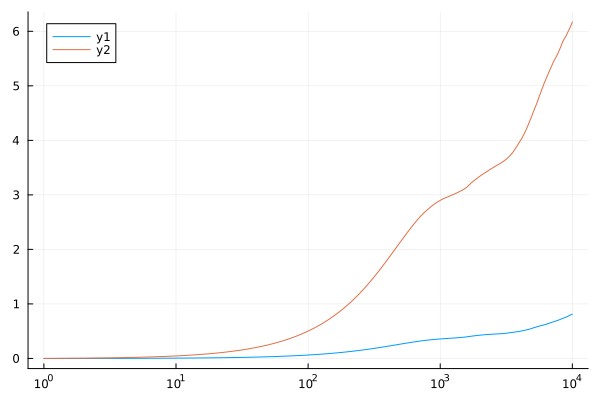

In [6]:
plot(L[1]*(1 .- dat[1][:,"imb"]), xaxis = :log)
plot!(L[1]*(1 .- dat[2][:,"imb"]), xaxis = :log)
# plot(dat[2][:,"meanSz"], xaxis = :log)

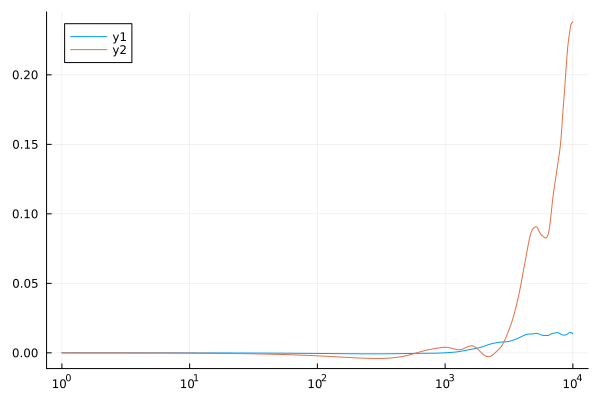

In [7]:
plot(dat[1][:,"meanSz"], xaxis = :log)
plot!(dat[2][:,"meanSz"], xaxis = :log)